# Example Dataset

## Importing Packages

In [1]:
from ISLP import load_data

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

## Preparing the Datasets

### 0. Importing the Datasets
For the sample only, we are going to import the `Credit` dataset from `ISLP`.

In [2]:
Credit = load_data('Credit')

### 1. Setting Up the Training and Test Datasets
We will split the original dataset into 4 different splitting strategies, with the proportion of traning and test as follows: 40/60, 60/40, 80/20, and 90/10.

First, we split the original dataset into feature and label columns, as the target we are considering now is `Student`.

In [3]:
Credit_feature = Credit.drop(columns=['Student'])
Credit_label = Credit['Student']

Then the feature and label are split into 4 splitting strategies as mentioned above.

In [4]:
training_sizes = {
    "40/60": 0.4,
    "60/40": 0.6,
    "80/20": 0.8,
    "90/10": 0.9,
}

datasets = {}

for name, training_size in training_sizes.items():
    feature_train, feature_test, label_train, label_test = train_test_split(
        Credit_feature, Credit_label,
        test_size=(1 - training_size),
        shuffle=True,
        stratify=Credit_label
    )

    datasets[name] = (feature_train, feature_test, label_train, label_test)

After splitting the datasets, the visualization of the class distribution is as follows.

#### Original Set

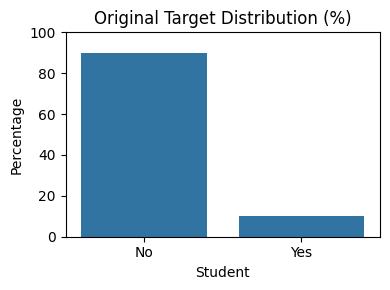

In [5]:
plt.figure(figsize=(4,3))
original_pct = Credit_label.value_counts(normalize=True) * 100
original_df = pd.DataFrame({
    'Student': original_pct.index.astype(str),
    'Percentage': original_pct.values
})

sns.barplot(data=original_df, x='Student', y='Percentage')
plt.title("Original Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Student")
plt.tight_layout()
plt.show()

#### Training Set

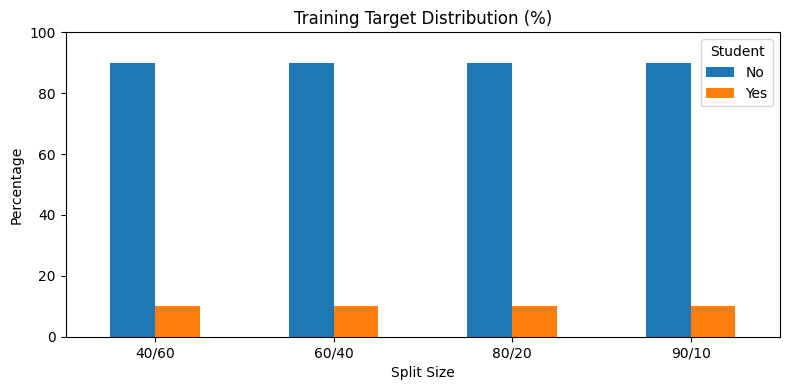

In [6]:
train_distributions = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    train_pct = label_train.value_counts(normalize=True) * 100
    train_distributions[name] = train_pct

train_df = pd.DataFrame(train_distributions).T

train_df.plot(kind='bar', figsize=(8, 4), legend=True)
plt.title("Training Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Split Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Test Set

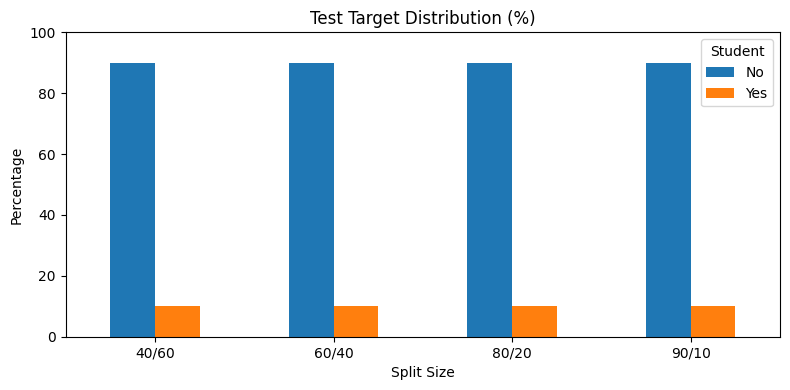

In [7]:
test_distributions = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    test_pct = label_test.value_counts(normalize=True) * 100
    test_distributions[name] = test_pct

test_df = pd.DataFrame(test_distributions).T

test_df.plot(kind='bar', figsize=(8, 4), legend=True)
plt.title("Test Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Split Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As can be seen from three plots above, the dataset is relatively balanced across both training and test splits, which indicates that the preparation was appropriate.

However, some features of the datasets appears to be categorical. Therefore, we are going to perform one-hot encoding on categorical feature columns using `sklearn`'s `OneHotEncoder`, together with label encoding on label column using `sklearn`'s `LabelEncoder`.

In [8]:
column_transformer = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(drop='first', sparse_output=False), ['Gender', 'Married', 'Ethnicity'])
    ],
    remainder='passthrough'
)

label_encoder = LabelEncoder()

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    feature_train = column_transformer.fit_transform(feature_train)
    feature_test = column_transformer.transform(feature_test)

    label_train = label_encoder.fit_transform(label_train)
    label_test = label_encoder.transform(label_test)

    datasets[name] = (feature_train, feature_test, label_train, label_test)

### 2. Building the Decision Tree Classifiers

After preparing the datasets, we now fit a Decision Tree Classifier to each training set and visualize the decision tree result.

#### Model Training
We apply the `DecisionTreeClassifier` on each splitted subsets.

In [9]:
models = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    model = tree.DecisionTreeClassifier(criterion='entropy')
    model.fit(feature_train, label_train)

    models[name] = model

#### Visualization
The visualization of the resulting decision trees is processed with Graphviz.

In [10]:
graphs = {}

for name, model in models.items():
    dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True)
    graph = graphviz.Source(dot_data)

    graphs[name] = graph

Decision Tree Graph for 40/60 splitting.

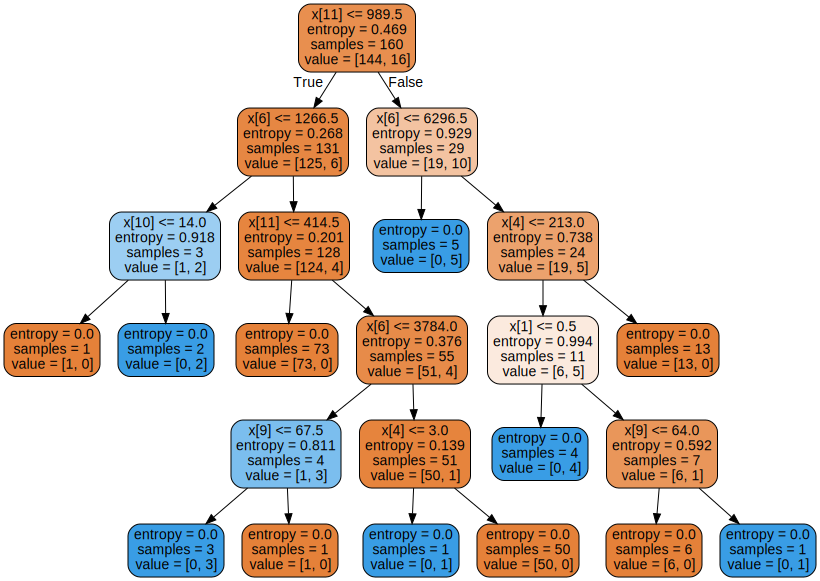

In [11]:
graphs['40/60']

Decision Tree Graph for 60/40 splitting.

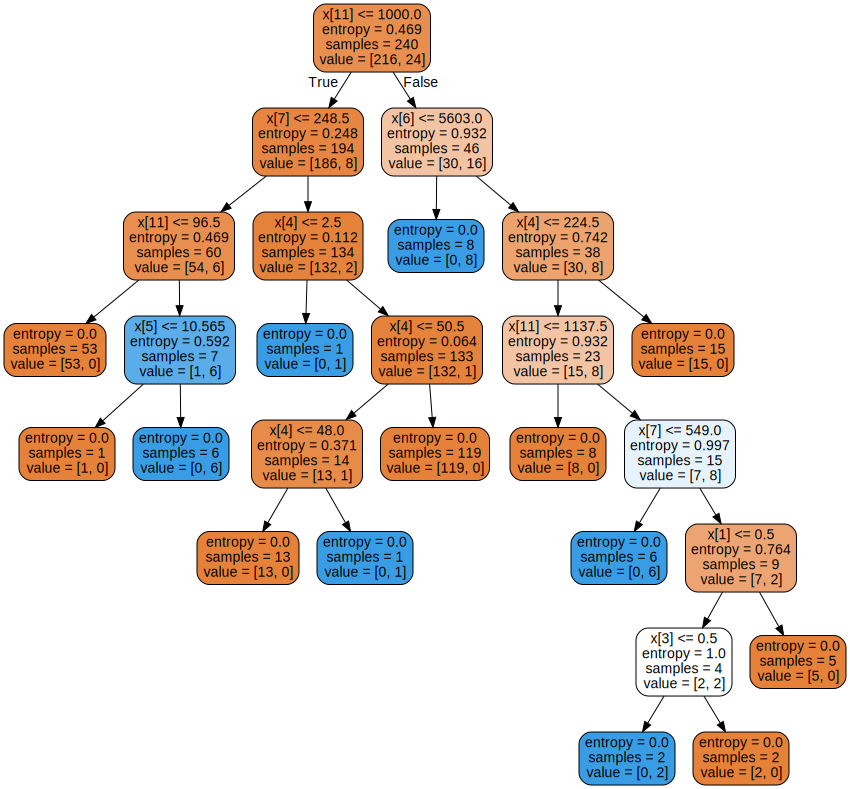

In [12]:
graphs['60/40']

Decision Tree Graph for 80/20 splitting.

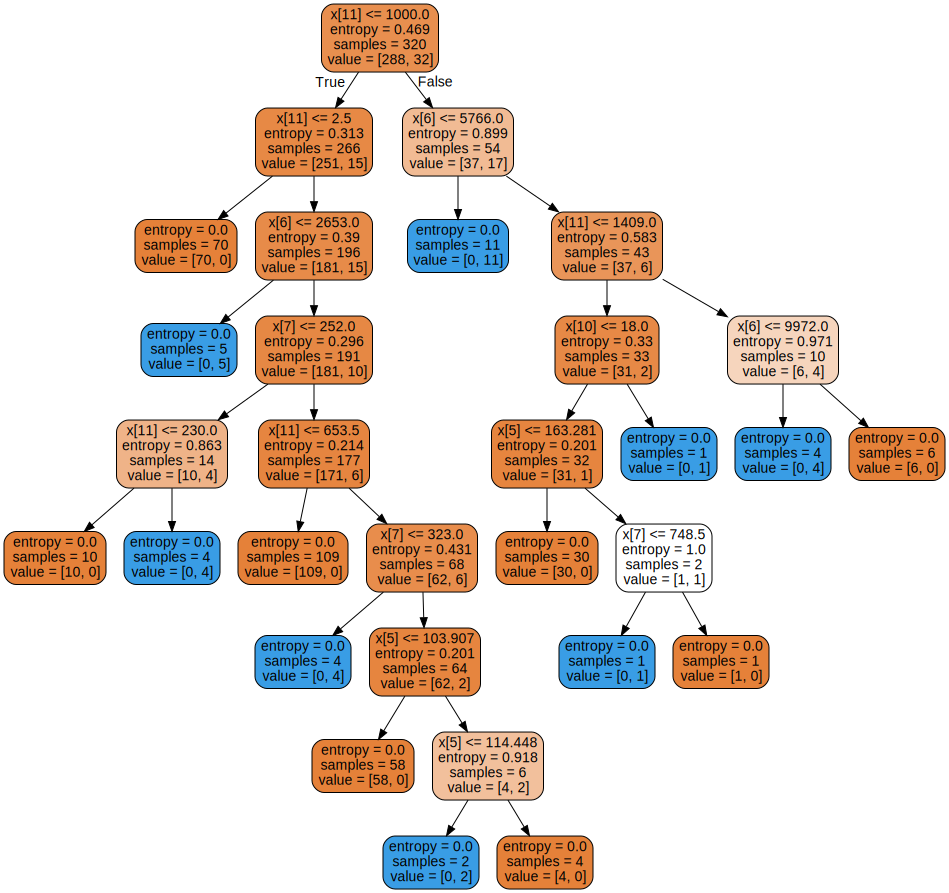

In [13]:
graphs['80/20']

Decision Tree Graph for 90/10 splitting.

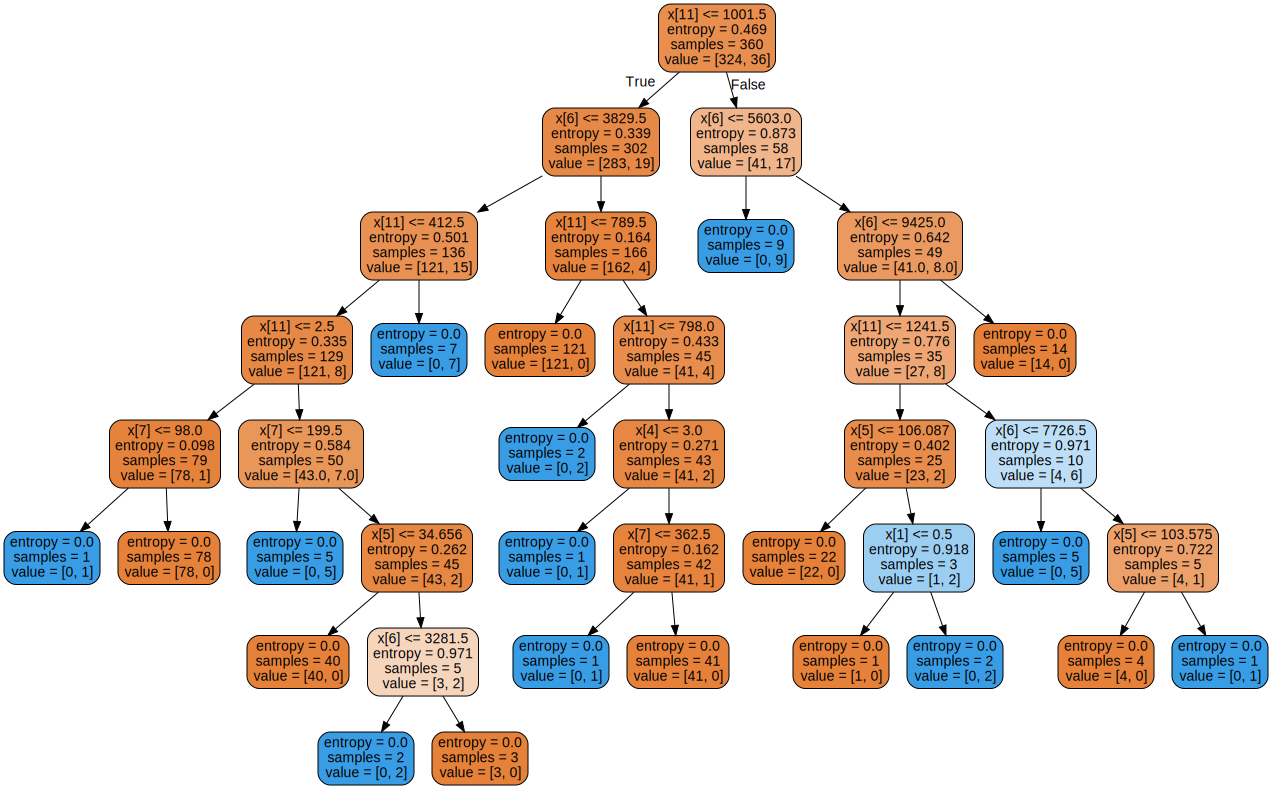

In [14]:
graphs['90/10']

### 3. Evaluating the Decison Tree Classifiers

#### a. 40/60 Splitting

#### b. 60/40 Splitting

#### c. 80/20 Splitting

#### d. 90/10 Splitting

#### e. Overall Insights

### 4. The Depth and Accuracy of A Decision Tree (80/20 Splitting)